### Import the libraries

In [1523]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


from mpl_toolkits.mplot3d import Axes3D

### Get the data

In [1524]:
# Get data from csv file
zoo_file = pd.read_csv('./datasets/zoo.csv')
zooClass_file = pd.read_csv('./datasets/zooClass.csv')
zoo = pd.DataFrame(zoo_file)
zooClass = pd.DataFrame(zooClass_file)

zoo_merge = pd.merge(zoo_file, zooClass_file, how='left', left_on='class_type', right_on='Class_Number')
zoo_feature_names = [col for col in zoo_merge.columns if col != 'Class_Number' and col != 'Number_Of_Animal_Species_In_Class' and col != 'Animal_Names' and col != 'Class_Type' and col != 'class_type' and col != 'animal_name']
zoo_data = zoo[zoo_feature_names]

# Prepare the data
# zoo_data = zoo[zoo_feature_names]
zoo_target = zoo_merge[zoo_merge.columns.values.tolist()[20]]

zoo_target_class = zoo_merge['class_type'] 

zoo_target_names = zoo_target.unique().tolist()
zoo_target_names = list(zooClass['Class_Type'])
print(zoo_target_names)
zoo_data3D = zoo_merge[zoo_merge.columns.values.tolist()[17]]

print('Features:',zoo_feature_names, 'Classes: ', zoo_target_names)


['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']
Features: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize'] Classes:  ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']


### Class Count

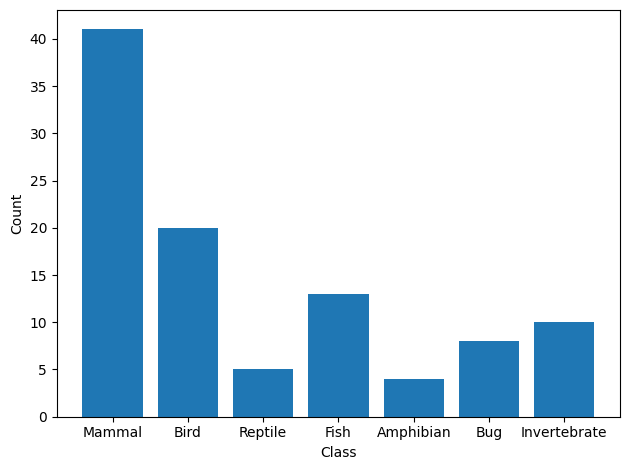

In [1525]:
import matplotlib.pyplot as plt

plt.bar(zooClass_file["Class_Type"], zooClass_file["Number_Of_Animal_Species_In_Class"])
plt.ylabel('Count')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

### Check Nulls

In [1526]:
import pandas as pd
from io import StringIO

# Seu conjunto de dados
data = """animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
elephant,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
fruitbat,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
giraffe,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
girl,1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1,1
gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
goat,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
gorilla,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1
gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
hamster,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
hare,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
kiwi,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2
ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6
lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
leopard,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
lion,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
lynx,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
mink,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1,1
mole,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
mongoose,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5
octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
opossum,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
oryx,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2
parakeet,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
penguin,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1,2
pheasant,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
piranha,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
platypus,1,0,1,1,0,1,1,0,1,1,0,0,4,1,0,1,1
polecat,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
pony,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
porpoise,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
puma,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
pussycat,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1,1
raccoon,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
reindeer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
rhea,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1,2
scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7
seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
seal,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,1
sealion,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1,1
seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3
seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7
skimmer,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
skua,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
sole,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
sparrow,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
squirrel,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,1
starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
stingray,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,4
swan,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,1,2
termite,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
toad,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5
tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3
tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
tuna,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
vampire,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0,1
vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
"""


# Criar DataFrame
df = pd.read_csv(StringIO(data), header=None)

# Encontrar linhas com NaN
nan_rows = df[df.isnull().any(axis=1)]

# Imprimir linhas com NaN
print(nan_rows)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
Index: []


#### Build the model and evaluate it
Decision trees, Naive bayes and KNN

In [1527]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()


# Data selection
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(zoo_data, zoo_target_class, test_size=0.15, random_state=27)


# Train the model on the training set
clf_model = clf.fit(X_train, y_train)


# Make predictions on new data
# X_new = np.array([[5.1, 3.5, 1.4, 0.2]])
# prediction = clf_model.predict(X_new)
# print("Prediction:", prediction)

# Evaluate the model on the test set
hd_score = clf_model.score(X_test, y_test)
print("Houldout test accuracy:", hd_score)

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score
acc_score = cross_val_score(clf, X_train, y_train, cv=5)
print("CV Mean Accuracy: %0.3f (+/- %0.3f)" % (acc_score.mean(), acc_score.std()) )
f1_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')
print("Mean F1: %0.3f (+/- %0.3f)" % (np.mean(f1_score), np.std(f1_score)) )

# More metrics: Precision Recall scores and Confusion matrix
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training test\n")
print(metrics.classification_report(y_test, clf_model.predict(X_test), digits=3))
print(metrics.confusion_matrix(y_test, clf_model.predict(X_test)))



Houldout test accuracy: 1.0
CV Mean Accuracy: 0.929 (+/- 0.024)
Mean F1: 0.836 (+/- 0.120)
Precision, Recall, Confusion matrix, in training test

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        10
           2      1.000     1.000     1.000         3
           4      1.000     1.000     1.000         1
           6      1.000     1.000     1.000         2

    accuracy                          1.000        16
   macro avg      1.000     1.000     1.000        16
weighted avg      1.000     1.000     1.000        16

[[10  0  0  0]
 [ 0  3  0  0]
 [ 0  0  1  0]
 [ 0  0  0  2]]


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Plot Tree with plot_tree

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']


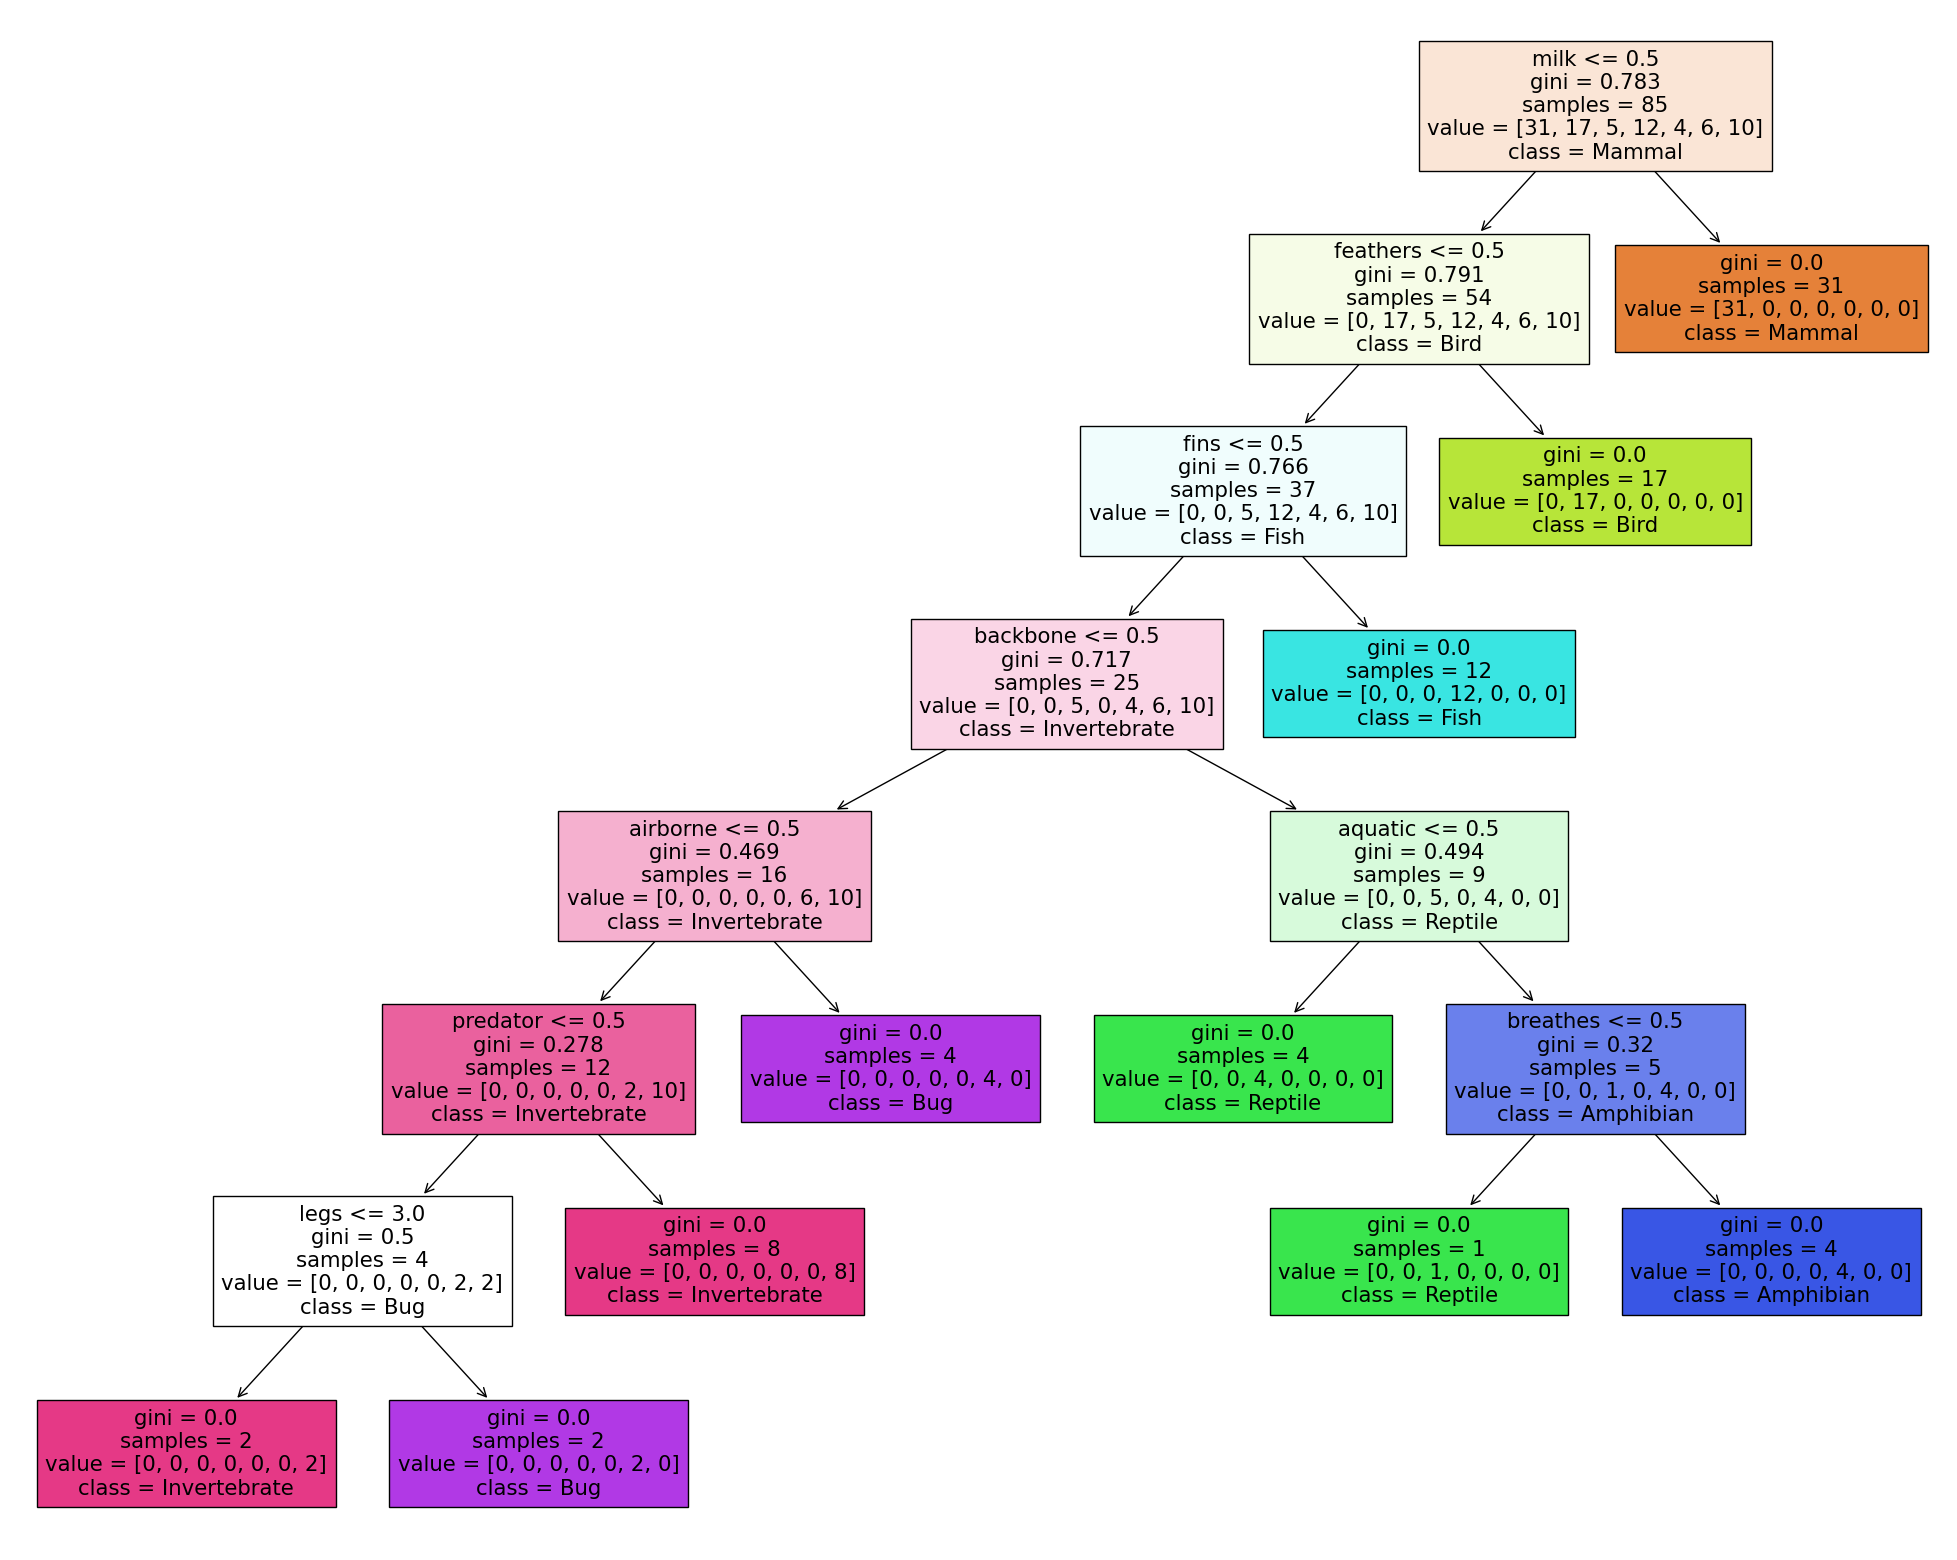

In [1528]:
# If you have created the Decision Tree model
from sklearn import tree
from matplotlib import pyplot as plt
#house_feature_names = [col for col in iris.columns if col != 'Neighborhood' and col != 'SquareFeet' and col != 'Bedrooms' and col != 'Bathrooms']
print(zoo_feature_names)
print(zoo_target_names)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_model, 
                   feature_names=zoo_feature_names,  
                   class_names=zoo_target_names,
                   filled=True)

## Clustering with K-Means

In [1529]:
# Import datasets library
from sklearn import datasets
zoo_file = pd.read_csv('./datasets/zoo.csv')
zooClass_file = pd.read_csv('./datasets/zooClass.csv')
zoo = pd.DataFrame(zoo_file)
zooClass = pd.DataFrame(zooClass_file)

# Prepare the data
zoo_feature_names = [col for col in zoo.columns if col != 'animal_name' and col != 'class_type']
zoo_data = zoo[zoo_feature_names]
zoo_feature_names2 = [col for col in zoo.columns if col != 'animal_name']
zoo_data2 = zoo[zoo_feature_names2[16]]-1 

# Preliminary data exploration
print(zoo_data.shape)     # Output: (150, 4)
print(zoo_feature_names)  # Output: ['sepal length (cm)', ...]


# Preprocessing the data (standardize)
scaler = StandardScaler()
scaled_zoo = scaler.fit_transform(zoo_data)
print(scaled_zoo)

(101, 16)
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
[[ 1.16139451 -0.49690399 -1.18522652 ... -1.69841555 -0.38435306
   1.13818037]
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]
 ...
 [ 1.16139451 -0.49690399 -1.18522652 ...  0.58878406 -0.38435306
   1.13818037]
 [-0.86103386 -0.49690399  0.84372057 ... -1.69841555 -0.38435306
  -0.87859537]
 [-0.86103386  2.01246118  0.84372057 ...  0.58878406 -0.38435306
  -0.87859537]]


### Finding the Optimal Number of Clusters with the Elbow Method

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

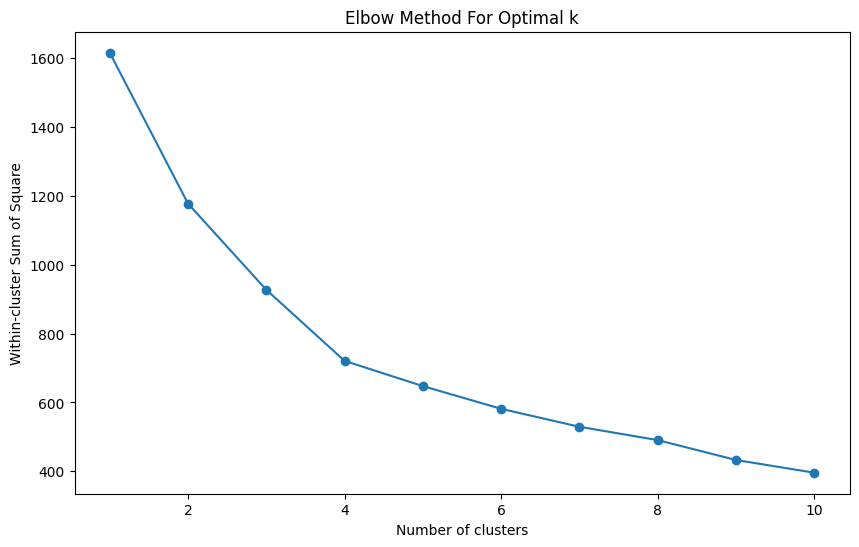

In [1530]:
# Calculate the within-cluster sum of square across different cluster counts
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_zoo)
    inertia.append(kmeans.inertia_)# Plot the elbow graph
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Square')
plt.show()

### Clustering and evaluating

In [1531]:
# Assuming the elbow is at three clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_zoo)

# Evaluating
# print(clusters)

# Adjusting clusters
adj_clusters = [(x + 2) %3 for x in clusters]
print(zoo_data2.values)
print(confusion_matrix(zoo_data2.values, adj_clusters))
print(classification_report(zoo_data2.values, adj_clusters))

[0 0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0 3 0 1 1 0 1 5 4 4 0 0 0 5 0 0 1 3 0 0
 1 3 5 5 1 5 1 0 0 6 0 0 0 0 5 4 6 0 0 1 1 1 1 3 3 2 0 0 0 0 0 0 0 0 1 6 3
 0 0 2 6 1 1 2 6 3 1 0 6 3 1 5 4 2 2 3 0 0 1 0 5 0 6 1]
[[14  0 27  0  0  0  0]
 [ 5 12  3  0  0  0  0]
 [ 1  2  2  0  0  0  0]
 [ 9  4  0  0  0  0  0]
 [ 0  1  3  0  0  0  0]
 [ 2  4  2  0  0  0  0]
 [ 1  1  8  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.44      0.34      0.38        41
           1       0.50      0.60      0.55        20
           2       0.04      0.40      0.08         5
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        10

    accuracy                           0.28       101
   macro avg       0.14      0.19      0.14       101
weighted avg       0.28      0.28      0.27       101



C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and 

### VIsualizing the clusters

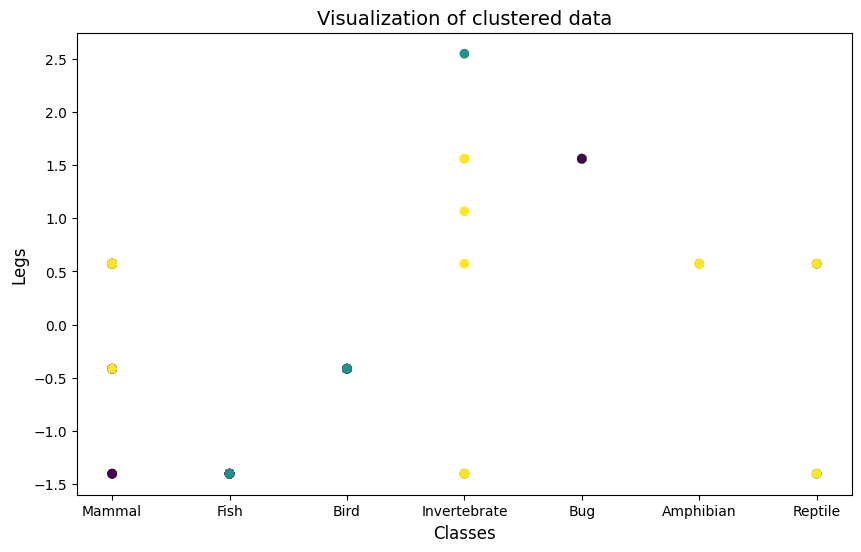

In [1532]:
# Choose two dimensions to plot (e.g., sepal length and width)
plt.figure(figsize=(10, 6))
plt.scatter(zoo_target.values,scaled_zoo[:,12], c=adj_clusters, cmap='viridis', marker='o')
plt.title('Visualization of clustered data', fontsize=14)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Legs', fontsize=12)
plt.show()

### Integrating Cluster Labels into the Iris Dataset

In [1533]:
# Convert the Iris dataset to a DataFrame for easier manipulation
zoo_df = pd.DataFrame(zoo_data, columns=zoo_feature_names)

# Add the cluster labels as a new column to the DataFrame
zoo_df['cluster'] = adj_clusters

# Now let's see the first 5 instances of our new dataset
print(zoo_df.head())

   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   
3     1         0     0     1         0        0         1        1         1   
4     1         0     0     1         0        0         1        1         1   

   breathes  venomous  fins  legs  tail  domestic  catsize  cluster  
0         1         0     0     4     0         0        1        2  
1         1         0     0     4     1         0        1        2  
2         0         0     1     0     1         0        0        0  
3         1         0     0     4     0         0        1        2  
4         1         0     0     4     1         0        1        2  


###  3D Visualization of Clusters

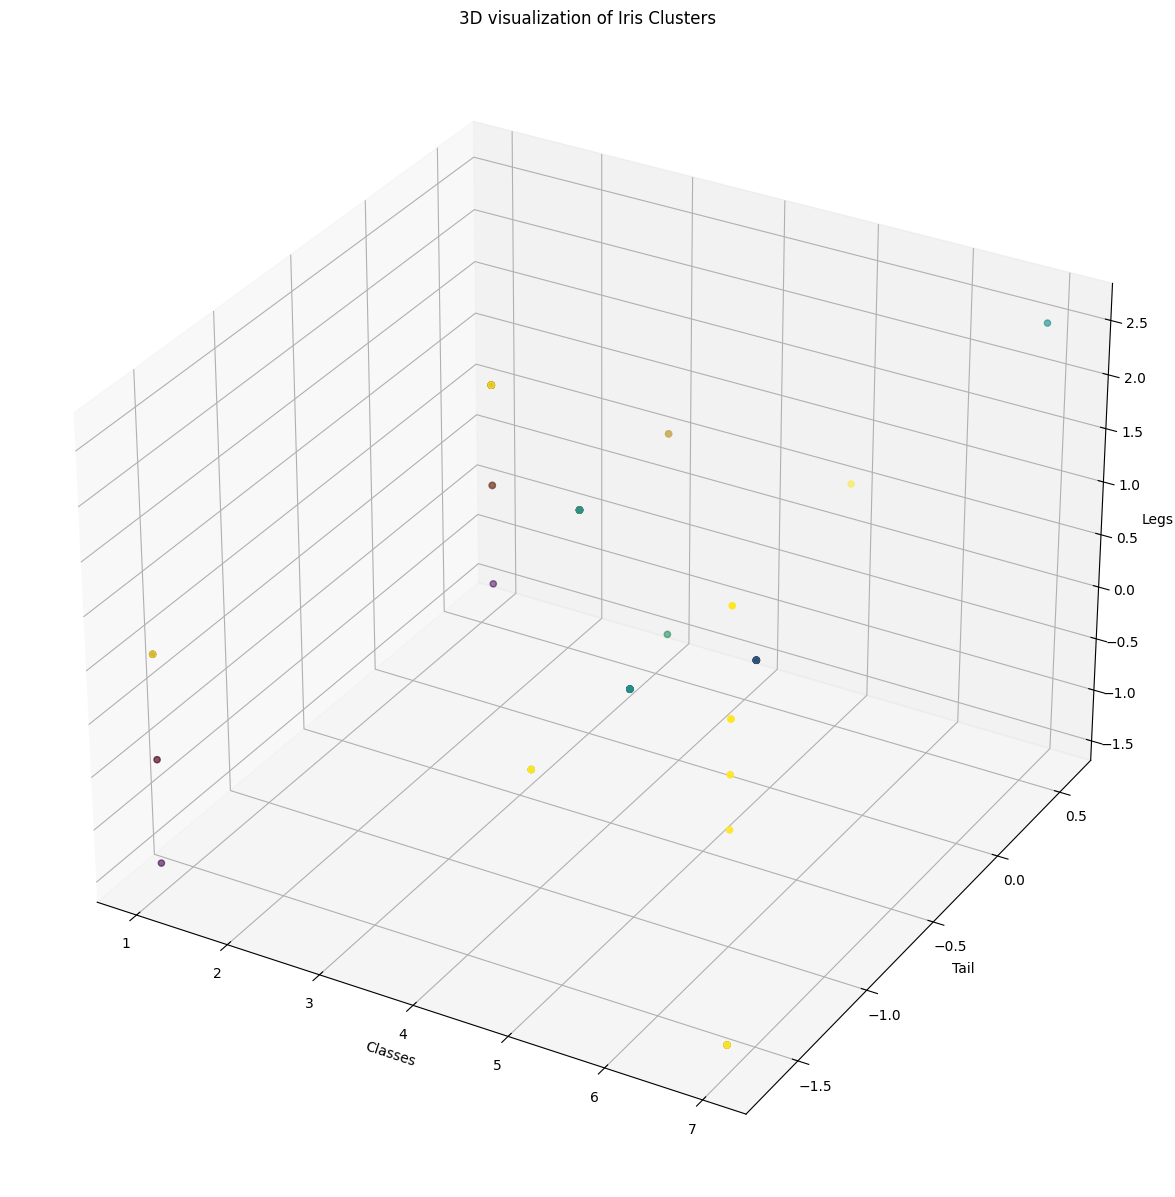

In [1534]:
# Assuming you've already completed clustering with KMeans
# clusters = kmeans.fit_predict(scaled_features)

# Create a 3D figure
fig = plt.figure(figsize=(16, 15))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot using the first three features of the Iris dataset
ax.scatter(zoo_data3D.values,  # fixed acidity
           scaled_zoo[:,13],  # volatile acidity
           scaled_zoo[:,12],  # citric acid
        #    scaled_iris[:,4],  # residual sugar
        #    scaled_iris[:,5],  # chlorides
        #    scaled_iris[:,6],  # free sulfur dioxide
        #    scaled_iris[:,7],  # total sulfur dioxide
        #    scaled_iris[:,8],  # density
        #    scaled_iris[:,9],  # pH
        #    scaled_iris[:,10],  # sulphates
        #    scaled_iris[:,11],  # alcohol
        #    scaled_iris[:,12],  # quality
           c=adj_clusters,            # Use cluster labels as color encoding
           cmap='viridis', 
           marker='o')

# Set labels according to the features we used
ax.set_xlabel('Classes')
ax.set_ylabel('Tail')
ax.set_zlabel('Legs')

# Title of the plot
ax.set_title('3D visualization of Iris Clusters')

# Show the plot
plt.show()

----
## Association Rules

----
### Using the MLXTEND library

In [1535]:
# Imports
from mlxtend.frequent_patterns import apriori, association_rules

# Get data from csv file
zoo_file = pd.read_csv('./datasets/zoo.csv')
zooClass_file = pd.read_csv('./datasets/zooClass.csv')
zoo = pd.DataFrame(zoo_file)
zooClass = pd.DataFrame(zooClass_file)

zoo_merge = pd.merge(zoo_file, zooClass_file, how='left', left_on='class_type', right_on='Class_Number')
# To remove missing values: raw_data.dropna(inplace=True)
# To filter qty > 0:        raw_data = raw_data[raw_data["quantity"] > 0]
# To remove end characters: raw_data["product_name"] = raw_data["product_name"].str.replace(r' - .*$', '')
zoo_merge.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


### Pivot table 

In [1536]:
# Group
ds_grouped = zoo_merge.groupby(['legs', 'class_type'], as_index=False).agg({'Class_Type':'count'})
ds_grouped.head(100)

# Create apriori data structure
ds_pivot = pd.pivot(data=ds_grouped, index='legs', columns='class_type',
                                    values='Class_Type').fillna(0).applymap(lambda x: True if x > 0 else False)

ds_pivot.tail(10)

C:\Users\pedro\AppData\Local\Temp\ipykernel_3484\3934588622.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  values='Class_Type').fillna(0).applymap(lambda x: True if x > 0 else False)


class_type,1,2,3,4,5,6,7
legs,,,,,,,
0,True,False,True,True,False,False,True
2,True,True,False,False,False,False,False
4,True,False,True,False,True,False,True
5,False,False,False,False,False,False,True
6,False,False,False,False,False,True,True
8,False,False,False,False,False,False,True


### Learning Rules (Association Rule Learning)

In [1537]:
# Get the rules
min_support=0.01
freq_itemsets = apriori(ds_pivot, min_support=min_support, use_colnames=True)
rules = association_rules(freq_itemsets, metric="support", min_threshold = min_support)    
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1),(2),0.500000,0.166667,0.166667,0.333333,2.0,0.083333,1.25,1.00
1,(2),(1),0.166667,0.500000,0.166667,1.000000,2.0,0.083333,inf,0.60
2,(1),(3),0.500000,0.333333,0.333333,0.666667,2.0,0.166667,2.00,1.00
3,(3),(1),0.333333,0.500000,0.333333,1.000000,2.0,0.166667,inf,0.75
4,(1),(4),0.500000,0.166667,0.166667,0.333333,2.0,0.083333,1.25,1.00


### Utility functions

In [1538]:
# Function for getting the class type by using animal name
def get_animal_type(zoo_info, animal_name):
    animal_names_list = zoo_info["Animal_Names"].str.split(', ')
    condition = animal_names_list.apply(lambda x: animal_name in x)
    
    if any(condition):
        class_type = zoo_info.loc[condition, "Class_Type"].values[0]
        return class_type
    else:
        return 'Animal doesnt exist' 

def get_animal_by_classType(zoo_info, classType):
    condition = zoo_info["class_type"] == classType
    
    if condition.any():
        animal_names_list = zoo_info.loc[condition, "Animal_Names"].values[0].split(', ')
        return animal_names_list
    else:
        return 'Animal class not found' 

# ———————————————————————————————
# Function to get the recommended products related to a specific product
def get_animals(target_id, dataframe, rules, rec_count):
    recomended_classes_ids = recommend_items(rules, target_id, rec_count)
    print(recomended_classes_ids)
    print(f'\nClasse escolhida: {target_id} ')
    print(f'Classes com o mesmo nº de pernas: {recomended_classes_ids}')
    for a in recommend_items(rules, target_id, rec_count):
        recomended_class_animals = get_animal_by_classType(dataframe,a)
        print(f'\nAnimais da classe {a}: {recomended_class_animals}')



# Function for simulating the recommendation process
def recommend_items(rules_df, class_type, rec_count):
    sorted_rules = rules_df.sort_values('lift', ascending=False)
    recommended_class_types = []

    for i, rule in sorted_rules["antecedents"].items():
        for j in list(rule):
            if j == class_type:
                recommended_class_types.append(list(sorted_rules.iloc[i]["consequents"]))

    recommended_class_types = list({item for item_list in recommended_class_types for item in item_list})
    recommended_class_types.remove(class_type)
    return recommended_class_types[:rec_count]


    
    


In [1539]:

# print(get_animal_by_classType(zoo_merge, 5))
print(get_animal_type(zoo_merge, 'pussycat'))

get_animals(4, zoo_merge,rules, 10)

Mammal
[1, 2, 3, 5, 7]

Classe escolhida: 4 
Classes com o mesmo nº de pernas: [1, 2, 3, 5, 7]

Animais da classe 1: ['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby', 'wolf']

Animais da classe 2: ['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk', 'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren']

Animais da classe 3: ['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara']

Animais da classe 5: ['frog', 'frog', 'newt', 'toad']

Animais da classe 7: ['clam', 'crab', 'crayfish', 'lobster', 'octopus', 'scorpion', 'seawasp', 'slug', 'starfish', 'worm']


### Association Rules (Other dataset)

In [1540]:
# Imports
from mlxtend.frequent_patterns import apriori, association_rules

# Get data from csv file
groceries = pd.read_csv('./datasets/groceries.csv')

groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [1541]:
# Group
ds_grouped = groceries.groupby(['Member_number', 'itemDescription'], as_index=False).agg({'Date':'count'})
ds_grouped.head(100)

# Create apriori data structure
ds_pivot = pd.pivot(data=ds_grouped, index='Member_number', columns='itemDescription',
                                    values='Date').fillna(0).applymap(lambda x: True if x > 0 else False)

ds_pivot.head(10)

C:\Users\pedro\AppData\Local\Temp\ipykernel_3484\430307709.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  values='Date').fillna(0).applymap(lambda x: True if x > 0 else False)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [1542]:
# Get the rules
min_support=0.01
freq_itemsets = apriori(ds_pivot, min_support=min_support, use_colnames=True)
print(freq_itemsets)
rules = association_rules(freq_itemsets, metric="support", min_threshold = min_support)    
rules.head()

       support                                           itemsets
0     0.015393                            (Instant food products)
1     0.078502                                         (UHT-milk)
2     0.031042                                    (baking powder)
3     0.119548                                             (beef)
4     0.079785                                          (berries)
...        ...                                                ...
3011  0.011031     (soda, whole milk, yogurt, whipped/sour cream)
3012  0.010518  (whole milk, rolls/buns, bottled water, yogurt...
3013  0.013597  (whole milk, rolls/buns, yogurt, sausage, othe...
3014  0.010005  (whole milk, rolls/buns, shopping bags, yogurt...
3015  0.013597  (whole milk, rolls/buns, yogurt, soda, other v...

[3016 rows x 2 columns]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
1,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
2,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
3,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960,0.230217


In [1543]:
# Function to get the recommended products related to a specific product
def get_golden_shot(target_id, rules, rec_count):
    recomended_exam_ids = recommend_items(rules, target_id, rec_count)
    print(f'\nTarget Grocerie: {target_id} ')
    print(f'Recommended Groceries: {recomended_exam_ids}')

# Function for simulating the recommendation process
def recommend_items(rules_df, itemDescription, rec_count):
    sorted_rules = rules_df.sort_values('lift', ascending=False) 
    # we are sorting the rules dataframe by using "lift" metric
    recommended_groceries = [] 

    for i, exam in sorted_rules["antecedents"].items(): 
        for j in list(exam):  
            if j == itemDescription:  
                recommended_groceries.append(
                    list(sorted_rules.iloc[i]["consequents"]))
    
    recommended_groceries = list({item for item_list in recommended_groceries for item in item_list}) 
    recommended_groceries.remove(itemDescription)
    return recommended_groceries[:rec_count]

In [1544]:
# Get the recommended exams
get_golden_shot('whole milk',rules, 10)
get_golden_shot('pip fruit',rules, 10)
get_golden_shot('UHT-milk',rules, 10)


Target Grocerie: whole milk 
Recommended Groceries: ['frozen meals', 'canned beer', 'specialty chocolate', 'newspapers', 'other vegetables', 'cat food', 'margarine', 'flour', 'pastry', 'onions']

Target Grocerie: pip fruit 
Recommended Groceries: ['rolls/buns', 'whole milk', 'frozen meals', 'ham', 'meat', 'detergent', 'processed cheese', 'butter', 'cream cheese ', 'chicken']

Target Grocerie: UHT-milk 
Recommended Groceries: ['rolls/buns', 'whole milk', 'frozen meals', 'meat', 'soda', 'canned beer', 'sausage', 'tropical fruit', 'brown bread', 'newspapers']
